In [4]:
from urllib.parse import quote_plus
import pandas as pd

In [5]:
merged_data = pd.read_csv(r"C:\Users\Sruthika\OneDrive\Desktop\Dataspark project\cleaned_data.csv", encoding='latin-1')
exchange_rates = pd.read_csv(r"C:\Users\Sruthika\OneDrive\Desktop\Dataspark project\exchange_rate", encoding='latin-1')

In [6]:
merged_data

,order_number,line_item,order_date,delivery_date,customerkey,storekey,productkey,quantity,currency_code,Delivery_Days,...,unit_price_usd,subcategorykey,subcategory,categorykey,category,profit_margin_usd,country_y,state_y,square_meters,open_date
0,366000,1,2016-01-01,2016-01-05,265598,10,1304,1,CAD,4,...,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,36.73,Canada,Nunavut,1210.0,2015-04-04
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,12,...,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,285.53,NaN,NaN,NaN,NaN
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,12,...,665.94,803,Microwaves,8,Home Appliances,445.30,NaN,NaN,NaN,NaN
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,11,...,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,173.92,NaN,NaN,NaN,NaN
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,11,...,326.00,301,Laptops,3,Computers,159.80,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-24,1216913,43,632,3,USD,4,...,139.00,305,Projectors & Screens,3,Computers,68.13,United States,Alaska,1190.0,2015-01-01
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR,4,...,120.00,106,Bluetooth Headphones,1,Audio,64.82,NaN,NaN,NaN,NaN
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD,3,...,109.99,602,Movie DVD,6,"Music, Movies and Audio Books",53.91,NaN,NaN,NaN,NaN
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD,3,...,70.13,702,Download Games,7,Games and Toys,37.88,NaN,NaN,NaN,NaN


In [65]:
merged_data['product_name'].unique()

array(['Contoso Lens Adapter M450 White',
       'A. Datum SLR Camera X136 Silver',
       'Fabrikam Microwave 1.5CuFt X1100 Black', ...,
       'Litware Floor Lamp M2015 Black',
       'Litware Home Theater System 4.1 Channel M413 Silver',
       'Litware Home Theater System 5.1 Channel M511 Black'], dtype=object)

In [66]:
import mysql.connector
from sqlalchemy import create_engine

# MySQL connection details
host = "127.0.0.1"  
user = "root"       
password = "Shyam1234@" 
new_database = "global_electronics" 

# Step 1: Connect to MySQL Server and Create Database
try:
    connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password
    )
    cursor = connection.cursor()
    cursor.execute(f"CREATE DATABASE IF NOT EXISTS {new_database};")
    print(f"Database '{new_database}' created successfully!")
except mysql.connector.Error as e:
    print(f"Error creating database: {e}")


Database 'global_electronics' created successfully!


In [67]:
# Step 2: Connect to the New Database
encoded_password = quote_plus(password)
try:
    engine = create_engine(f"mysql+mysqlconnector://{user}:{encoded_password}@{host}/{new_database}")
    connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=new_database
    )
    cursor = connection.cursor()
    print(f"Connected to database '{new_database}' successfully!")
except mysql.connector.Error as e:
    print(f"Error connecting to database: {e}")


Connected to database 'global_electronics' successfully!


In [68]:
# Updated Table Creation Queries
create_merged_table = """
CREATE TABLE IF NOT EXISTS merged_data (
    order_number BIGINT,
    line_item INT,
    order_date DATE,
    delivery_date DATE,
    customerkey BIGINT,
    storekey INT,
    productkey INT,
    quantity INT,
    currency_code VARCHAR(10),
    Delivery_Days INT,
    gender VARCHAR(10),
    name VARCHAR(255),
    city VARCHAR(255),
    state_code VARCHAR(10),
    state_x VARCHAR(255),
    zip_code VARCHAR(10),
    country_x VARCHAR(255),
    continent VARCHAR(50),
    dob DATE,
    birthyear INT,
    product_name VARCHAR(255),
    brand VARCHAR(255),
    color VARCHAR(50),
    unit_cost_usd FLOAT,
    unit_price_usd FLOAT,
    subcategorykey INT,
    subcategory VARCHAR(255),
    categorykey INT,
    category VARCHAR(255),
    profit_margin_usd FLOAT,
    country_y VARCHAR(255),
    state_y VARCHAR(255),
    square_meters FLOAT,
    open_date DATE
);
"""

create_exchange_table = """
CREATE TABLE IF NOT EXISTS exchange_rates (
    date DATE,
    currency VARCHAR(10),
    exchange FLOAT
);
"""

# Execute Table Creation Queries
try:
    cursor.execute(create_merged_table)
    print("Table 'merged_data' created successfully!")
    cursor.execute(create_exchange_table)
    print("Table 'exchange_rates' created successfully!")
except mysql.connector.Error as e:
    print(f"Error creating tables: {e}")


Table 'merged_data' created successfully!
Table 'exchange_rates' created successfully!


In [69]:
# Step: Insert Data into Tables
try:
    # Insert `merged_data` into the 'merged_data' table
    merged_data.to_sql(name='merged_data', con=engine, if_exists='replace', index=False)
    print("Data inserted into 'merged_data' table successfully!")

    # Insert `exchange_rates` into the 'exchange_rates' table
    exchange_rates.to_sql(name='exchange_rates', con=engine, if_exists='replace', index=False)
    print("Data inserted into 'exchange_rates' table successfully!")
except Exception as e:
    print(f"Error inserting data into tables: {e}")
finally:
    if connection.is_connected():
        print("MySQL connection closed.")

Data inserted into 'merged_data' table successfully!
Data inserted into 'exchange_rates' table successfully!
MySQL connection closed.


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


Gender      CustomerCount
--------  ---------------
Male                31804
Female              31080


C:\Users\Sruthika\AppData\Local\Temp\ipykernel_7796\802302018.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="CustomerCount", data=gender_df, palette='pastel')


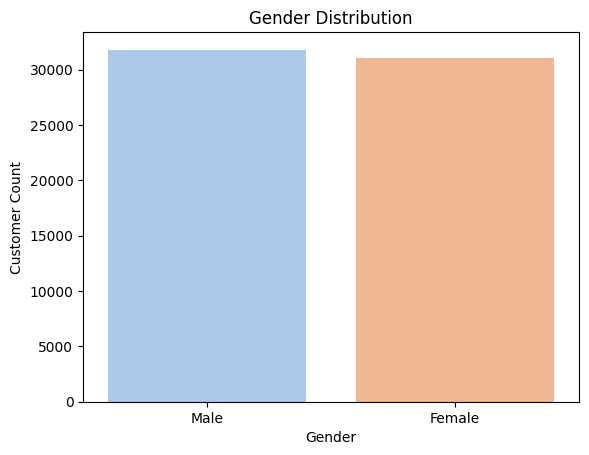

In [71]:
# SQL Query for Gender Distribution
cursor.execute("SELECT Gender, COUNT(*) AS CustomerCount FROM global_electronics.merged_data GROUP BY Gender;")
rows = cursor.fetchall()
print(tabulate(rows, headers=["Gender", "CustomerCount"]))

# Convert to DataFrame
gender_df = pd.DataFrame(rows, columns=["Gender", "CustomerCount"])

# Visualization
sns.barplot(x="Gender", y="CustomerCount", data=gender_df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Customer Count')
plt.show()



In [72]:
# Add the 'Generation' column
cursor.execute("ALTER TABLE global_electronics.merged_data ADD COLUMN Generation VARCHAR(50);")

# Classify customers into generations
cursor.execute("""
UPDATE global_electronics.merged_data
SET Generation = CASE
    WHEN birthyear BETWEEN 1997 AND 2012 THEN 'Gen Z (1997-2012)'
    WHEN birthyear BETWEEN 1981 AND 1996 THEN 'Millennials (1981-1996)'
    WHEN birthyear BETWEEN 1965 AND 1980 THEN 'Gen X (1965-1980)'
    WHEN birthyear BETWEEN 1946 AND 1964 THEN 'Baby Boomers (1946-1964)'
    WHEN birthyear BETWEEN 1928 AND 1945 THEN 'Silent Generation (1928-1945)'
    ELSE 'Greatest Generation (before 1928)'
END;
""")
connection.commit()  # Commit the changes


Generation                       CustomerCount
-----------------------------  ---------------
Gen X (1965-1980)                        14989
Millennials (1981-1996)                  15015
Baby Boomers (1946-1964)                 17713
Silent Generation (1928-1945)             9977
Gen Z (1997-2012)                         5190


C:\Users\Sruthika\AppData\Local\Temp\ipykernel_7796\1796021944.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Generation", y="CustomerCount", data=generation_df, palette='viridis')


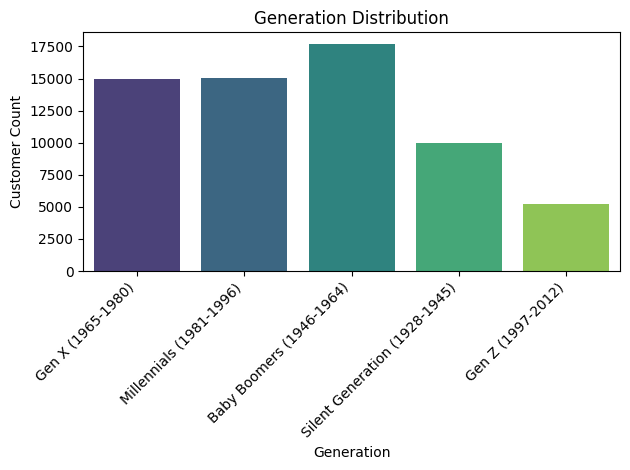

In [73]:
# Fetch data for generation distribution
cursor.execute("SELECT Generation, COUNT(*) AS CustomerCount FROM global_electronics.merged_data GROUP BY Generation;")
rows = cursor.fetchall()
print(tabulate(rows, headers=["Generation", "CustomerCount"]))

# Store the values as a DataFrame
generation_df = pd.DataFrame(rows, columns=["Generation", "CustomerCount"])

# Plot the bar chart
sns.barplot(x="Generation", y="CustomerCount", data=generation_df, palette='viridis')
plt.title('Generation Distribution')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Generation')
plt.ylabel('Customer Count')
plt.tight_layout()
plt.show()


country_x         CustomerCount
--------------  ---------------
Canada                     5415
United States             33767
United Kingdom             8140
Netherlands                2250
Italy                      2685
France                     1730
Germany                    5956
Australia                  2941


C:\Users\Sruthika\AppData\Local\Temp\ipykernel_7796\2128349774.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="country_x", y="CustomerCount", data=continent_df, palette='muted')


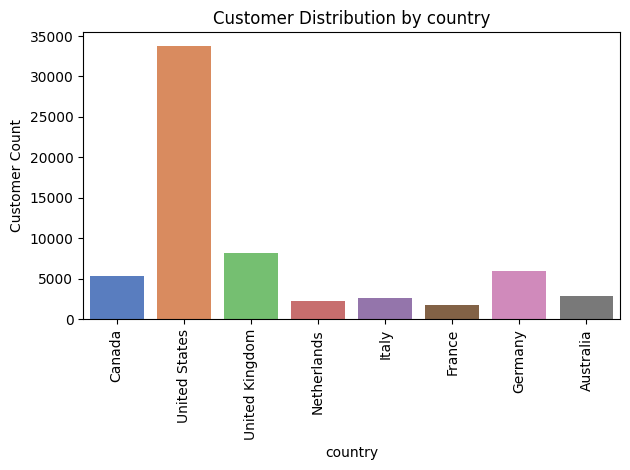

In [74]:
# SQL Query
cursor.execute("SELECT country_x, COUNT(*) AS CustomerCount FROM global_electronics.merged_data GROUP BY country_x;")
rows = cursor.fetchall()
print(tabulate(rows, headers=["country_x", "CustomerCount"]))

# Visualization
continent_df = pd.DataFrame(rows, columns=["country_x", "CustomerCount"])
sns.barplot(x="country_x", y="CustomerCount", data=continent_df, palette='muted')
plt.title('Customer Distribution by country')
plt.xlabel('country')
plt.ylabel('Customer Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [75]:
# SQL Query
cursor.execute("""
    SELECT AVG(quantity * unit_price_usd) AS AverageOrderValue 
    FROM global_electronics.merged_data;
""")
rows = cursor.fetchall()
print(tabulate(rows, headers=["AverageOrderValue"]))

# Output
avg_order_value = rows[0][0]
print(f"Average Order Value: {avg_order_value:.2f} USD")


  AverageOrderValue
-------------------
             886.64
Average Order Value: 886.64 USD


Product Name                                  Total Quantity
------------------------------------------  ----------------
WWI Desktop PC2.33 X2330 Black                           550
WWI Desktop PC1.80 E1800 White                           538
Adventure Works Desktop PC1.60 ED160 Black               521
Adventure Works Desktop PC2.30 MD230 White               521
Adventure Works Desktop PC1.80 ED180 Black               520
Adventure Works Desktop PC2.30 MD230 Black               514
WWI Desktop PC1.60 E1600 Black                           509
WWI Desktop PC1.60 E1600 Silver                          507
WWI Desktop PC1.60 E1600 Red                             505
WWI Desktop PC1.80 E1801 Black                           505


C:\Users\Sruthika\AppData\Local\Temp\ipykernel_7796\1946488085.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total Quantity", y="Product Name", data=products_df, palette='coolwarm')


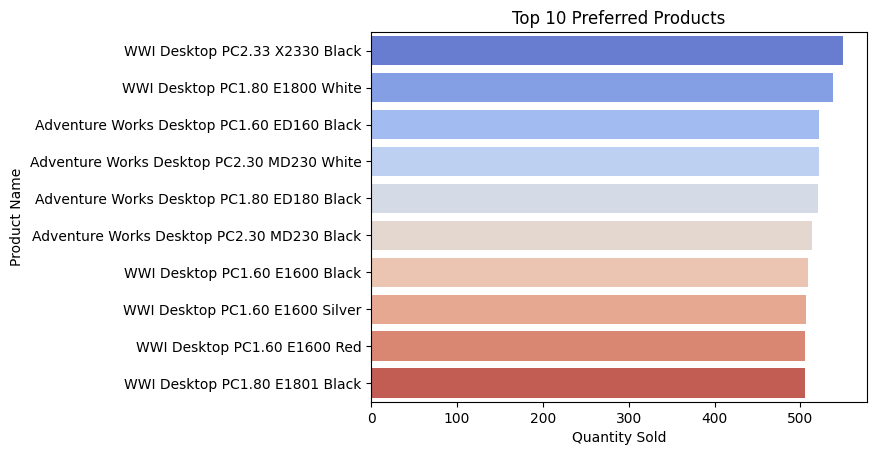

In [76]:
# SQL Query
cursor.execute("""
    SELECT product_name, SUM(quantity) AS TotalQuantity 
    FROM global_electronics.merged_data 
    GROUP BY product_name 
    ORDER BY TotalQuantity DESC 
    LIMIT 10;
""")
rows = cursor.fetchall()
print(tabulate(rows, headers=["Product Name", "Total Quantity"]))

# Visualization
products_df = pd.DataFrame(rows, columns=["Product Name", "Total Quantity"])
sns.barplot(x="Total Quantity", y="Product Name", data=products_df, palette='coolwarm')
plt.title('Top 10 Preferred Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()


  Year    Total Sales
------  -------------
  2016    6.94679e+06
  2017    7.42142e+06
  2018    1.2789e+07
  2019    1.82644e+07
  2020    9.29463e+06
  2021    1.03929e+06


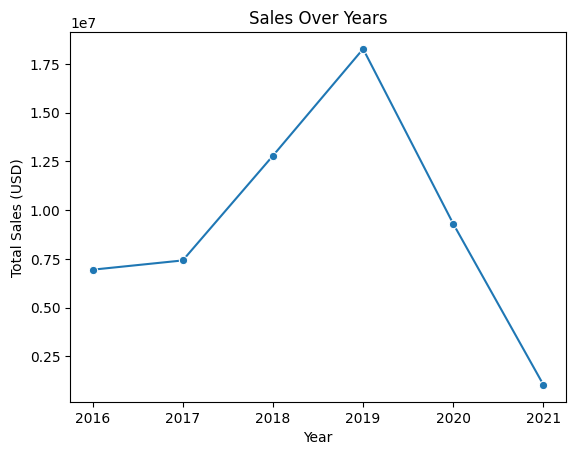

In [77]:
# SQL Query to group sales by year
cursor.execute("""
    SELECT YEAR(order_date) AS Year, SUM(quantity * unit_price_usd) AS TotalSales 
    FROM global_electronics.merged_data 
    GROUP BY Year 
    ORDER BY Year;
""")
rows = cursor.fetchall()
print(tabulate(rows, headers=["Year", "Total Sales"]))

# Visualization
sales_df = pd.DataFrame(rows, columns=["Year", "Total Sales"])
sales_df["Year"] = sales_df["Year"].astype(int)  # Ensure Year is an integer for proper visualization
sns.lineplot(x="Year", y="Total Sales", data=sales_df, marker='o')
plt.title('Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales (USD)')
plt.xticks(sales_df["Year"])  # Show each year on the x-axis
plt.show()


Currency Code      Total Sales
---------------  -------------
CAD                4.72433e+06
USD                2.98716e+07
GBP                7.08409e+06
EUR                1.13673e+07
AUD                2.70814e+06


C:\Users\Sruthika\AppData\Local\Temp\ipykernel_7796\2160942058.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Currency Code", y="Total Sales", data=currency_df, palette='rocket')


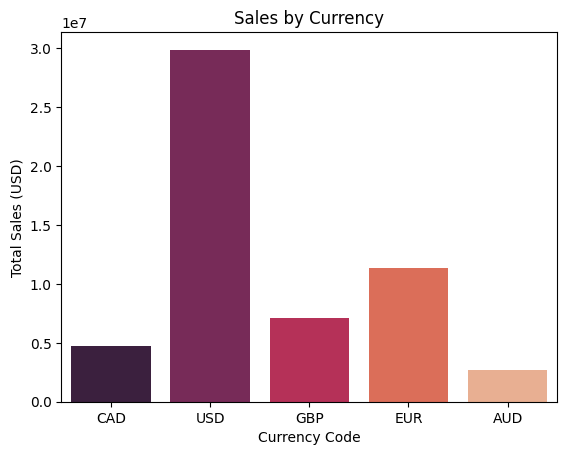

In [78]:
# SQL Query
cursor.execute("""
    SELECT currency_code, SUM(quantity * unit_price_usd) AS TotalSales 
    FROM global_electronics.merged_data 
    GROUP BY currency_code;
""")
rows = cursor.fetchall()
print(tabulate(rows, headers=["Currency Code", "Total Sales"]))

# Visualization
currency_df = pd.DataFrame(rows, columns=["Currency Code", "Total Sales"])
sns.barplot(x="Currency Code", y="Total Sales", data=currency_df, palette='rocket')
plt.title('Sales by Currency')
plt.xlabel('Currency Code')
plt.ylabel('Total Sales (USD)')
plt.show()



Product Name                                   Total Profit
-------------------------------------------  --------------
WWI Desktop PC2.33 X2330 Black                       337986
Adventure Works Desktop PC2.33 XD233 Silver          311664
Adventure Works Desktop PC2.33 XD233 Brown           310368
Adventure Works Desktop PC2.33 XD233 Black           299353
Adventure Works Desktop PC2.33 XD233 White           292225
WWI Desktop PC2.33 X2330 White                       283908
WWI Desktop PC2.33 X2330 Brown                       282679
Adventure Works 52" LCD HDTV X590 White              263727
Adventure Works 52" LCD HDTV X590 Black              250153
WWI Desktop PC2.33 X2330 Silver                      240892


C:\Users\Sruthika\AppData\Local\Temp\ipykernel_7796\2908969673.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total Profit", y="Product Name", data=profit_df, palette='cool')


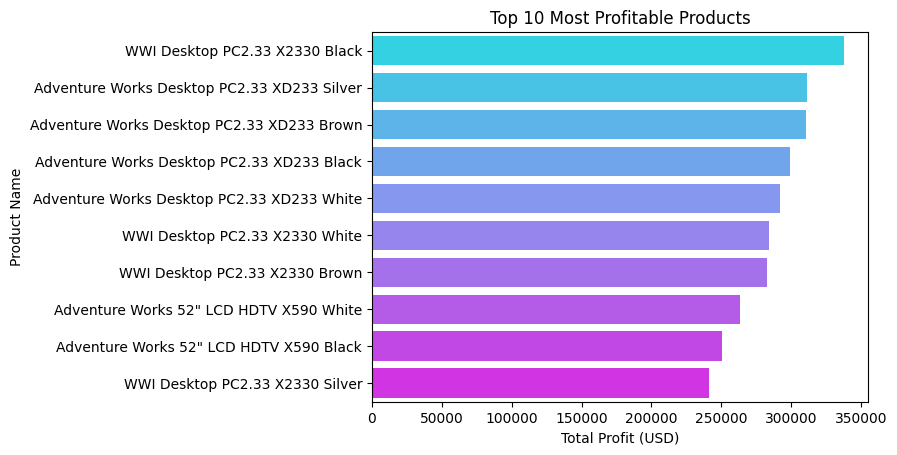

In [79]:
# SQL Query
cursor.execute("""
    SELECT product_name, SUM(profit_margin_usd * quantity) AS TotalProfit 
    FROM global_electronics.merged_data 
    GROUP BY product_name 
    ORDER BY TotalProfit DESC 
    LIMIT 10;
""")
rows = cursor.fetchall()
print(tabulate(rows, headers=["Product Name", "Total Profit"]))

# Visualization
profit_df = pd.DataFrame(rows, columns=["Product Name", "Total Profit"])
sns.barplot(x="Total Profit", y="Product Name", data=profit_df, palette='cool')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit (USD)')
plt.ylabel('Product Name')
plt.show()


Category                            Total Sales
-----------------------------  ----------------
Computers                           1.93016e+07
Home Appliances                     1.07955e+07
Cameras and camcorders              6.52017e+06
Cell phones                         6.18379e+06
TV and Video                        5.92898e+06
Audio                               3.16963e+06
Music, Movies and Audio Books       3.13101e+06
Games and Toys                 724829


C:\Users\Sruthika\AppData\Local\Temp\ipykernel_7796\3579547897.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total Sales", y="Category", data=category_df, palette='cividis')


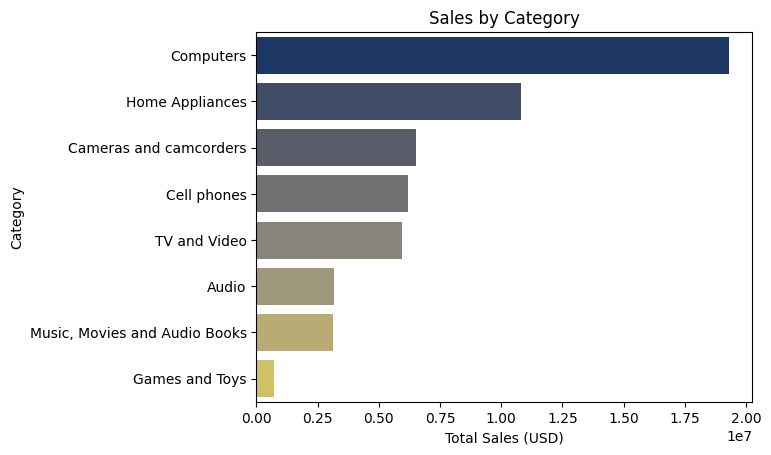

In [80]:
# SQL Query
cursor.execute("""
    SELECT category, SUM(quantity * unit_price_usd) AS TotalSales 
    FROM global_electronics.merged_data 
    GROUP BY category 
    ORDER BY TotalSales DESC;
""")
rows = cursor.fetchall()
print(tabulate(rows, headers=["Category", "Total Sales"]))

# Visualization
category_df = pd.DataFrame(rows, columns=["Category", "Total Sales"])
sns.barplot(x="Total Sales", y="Category", data=category_df, palette='cividis')
plt.title('Sales by Category')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Category')
plt.show()


  StoreKey  Country         State                         City                                   Total Sales    Store Size (sqm)  Open Date      Sales Per sqm
----------  --------------  ----------------------------  -----------------------------------  -------------  ------------------  -----------  ---------------
         8  Canada          Newfoundland and Labrador     Toronto                                  175215                   2105  2014-07-02       83.2377
         9  Canada          Northwest Territories         Toronto                                  158394                   1500  2005-03-04      105.596
        55  United States   Nevada                        Las Vegas                                127615                   2000  2009-12-15       63.8076
        10  Canada          Nunavut                       Toronto                                  120413                   1210  2015-04-04       99.5145
        64  United States   Washington DC                 Washi

C:\Users\Sruthika\AppData\Local\Temp\ipykernel_7796\1521935757.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total Sales", y="City", data=top_stores, palette="Blues_r")


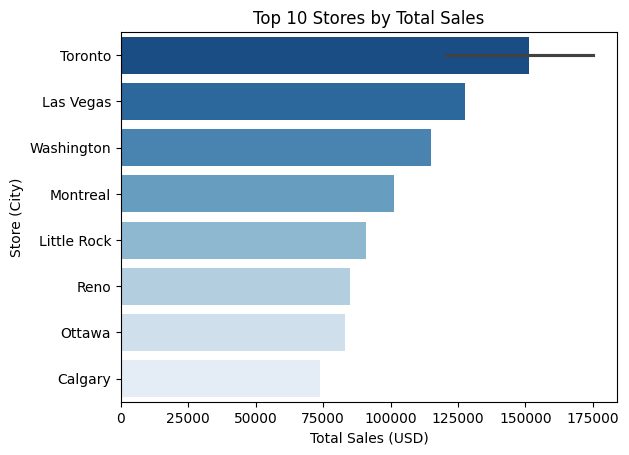

C:\Users\Sruthika\AppData\Local\Temp\ipykernel_7796\1521935757.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sales Per sqm", y="City", data=top_stores, palette="Greens_r")


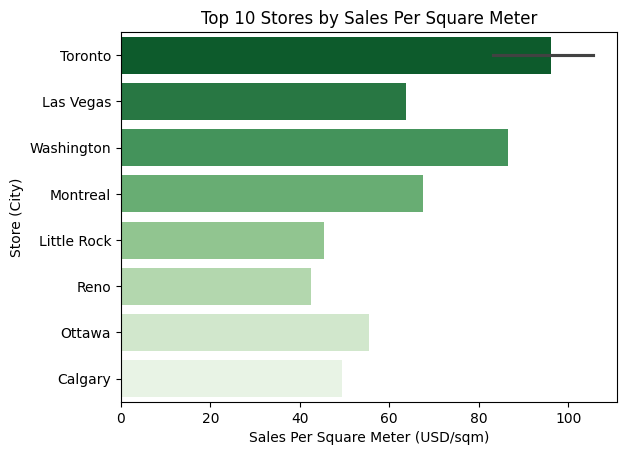

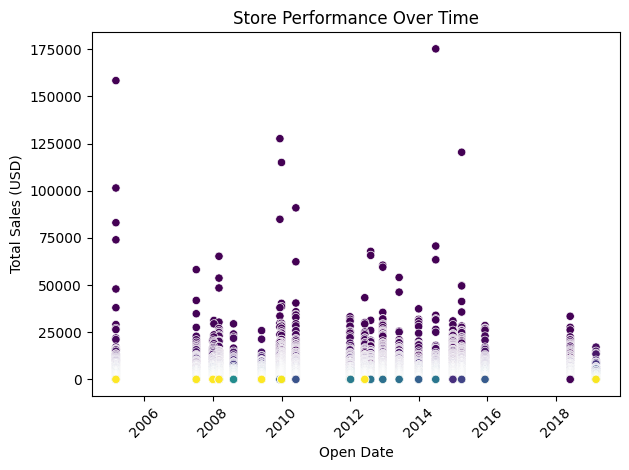

In [81]:
# SQL Query to evaluate store performance
cursor.execute("""
    SELECT 
        storekey,
        country_y AS Country,
        state_y AS State,
        city AS City,
        SUM(quantity * unit_price_usd) AS TotalSales,
        square_meters AS StoreSize,
        open_date AS OpenDate,
        SUM(quantity * unit_price_usd) / square_meters AS SalesPerSquareMeter
    FROM global_electronics.merged_data
    WHERE square_meters IS NOT NULL AND square_meters > 0
    GROUP BY storekey, Country, State, City, StoreSize, OpenDate
    ORDER BY TotalSales DESC;
""")
rows = cursor.fetchall()
print(tabulate(rows, headers=["StoreKey", "Country", "State", "City", "Total Sales", "Store Size (sqm)", "Open Date", "Sales Per sqm"]))

# Store the result in a DataFrame
store_performance_df = pd.DataFrame(rows, columns=["StoreKey", "Country", "State", "City", "Total Sales", "Store Size (sqm)", "Open Date", "Sales Per sqm"])

# Convert data types for proper visualization
store_performance_df["Total Sales"] = store_performance_df["Total Sales"].astype(float)
store_performance_df["Store Size (sqm)"] = store_performance_df["Store Size (sqm)"].astype(float)
store_performance_df["Sales Per sqm"] = store_performance_df["Sales Per sqm"].astype(float)
store_performance_df["Open Date"] = pd.to_datetime(store_performance_df["Open Date"])

# Visualization 1: Top 10 Stores by Total Sales
top_stores = store_performance_df.nlargest(10, "Total Sales")
sns.barplot(x="Total Sales", y="City", data=top_stores, palette="Blues_r")
plt.title("Top 10 Stores by Total Sales")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Store (City)")
plt.show()

# Visualization 2: Sales per Square Meter for Top 10 Stores
sns.barplot(x="Sales Per sqm", y="City", data=top_stores, palette="Greens_r")
plt.title("Top 10 Stores by Sales Per Square Meter")
plt.xlabel("Sales Per Square Meter (USD/sqm)")
plt.ylabel("Store (City)")
plt.show()

# Visualization 3: Store Open Date vs Total Sales
sns.scatterplot(x="Open Date", y="Total Sales", data=store_performance_df, hue="City", palette="viridis", legend=False)
plt.title("Store Performance Over Time")
plt.xlabel("Open Date")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
